## Customer segmentation data from Kaggle

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

We are required to help the manager to predict the right group of the new customers.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [49]:
df = pd.read_csv('cars_Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


This is a classification problem with target "Segmentation" column (A, B, C, D ).

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


This datasrt has 11 features and 8068 rows of data.

In [51]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [80]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Age ranges from 18 to 89, work experiance from 0 to 14 and family size from 1 to 9. 

In [53]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

C:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


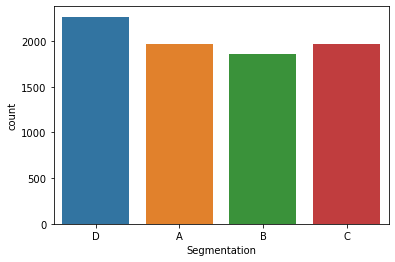

In [54]:
sns.countplot(df['Segmentation']);

Dataset looks balanced

In [62]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

C:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


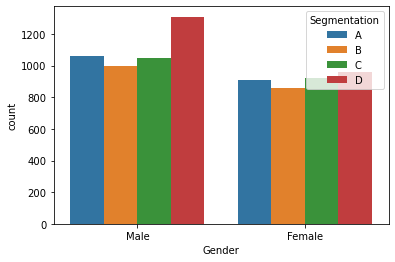

In [63]:
sns.countplot('Gender', hue='Segmentation', data=df, hue_order=['A','B','C','D']);

There is more Male buyers overall especialy in "D" segment.

In [65]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

C:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


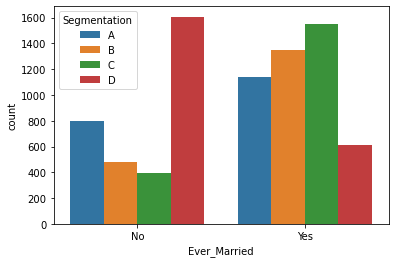

In [66]:
sns.countplot('Ever_Married', hue='Segmentation', data=df, hue_order=['A','B','C','D']);

Also majority of not-married customers are in "D" segment.

In [67]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

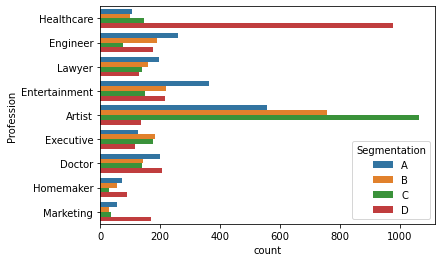

In [68]:
sns.countplot(y='Profession', hue='Segmentation', data=df, hue_order=['A','B','C','D']);

Most of "D" segment customers employed in healthcare, "C" segment mostly artist, also there is many artists in "A" and "B" segment.

In [69]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

C:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


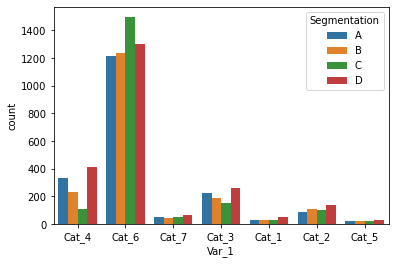

In [70]:
sns.countplot('Var_1', hue='Segmentation', data=df, hue_order=['A','B','C','D']);

Most of the segments are in "cat_6".

In [71]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

C:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


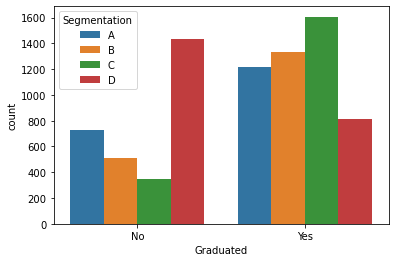

In [73]:
sns.countplot('Graduated', hue='Segmentation', data=df, hue_order=['A','B','C','D']);

Majority of "D" segment are not gratuated. The majority of other segments are.

In [78]:
df['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

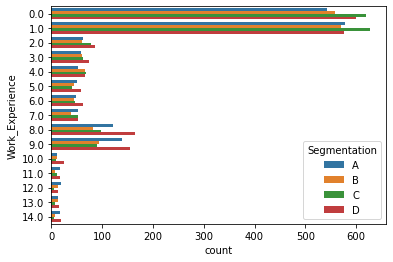

In [77]:
sns.countplot(y='Work_Experience', hue='Segmentation', data=df, hue_order=['A','B','C','D']);

After analyzing our data by segments i wouls assume that:
- Seament "A" mostly includes male, married, artist, graduated, with 1 year or less work experiance and belomg in cat_6;
- Segment "B": male, married, artist, graduated, with 1 year or less work experiance and belong in cat_6;
- Segment "C": male, married, artist, graduated, with 1 year or less work experiance and belong in cat_6;
- Segment "D": male, not married, healthcare worker, not gratuated, with 1 year or less work experiance and belong in cat_6;

Since majority of our data has very similar values, i would use "Most frequent" form of imputation of missing data.

In [82]:
#Droping ID column
df.drop(columns='ID', inplace=True)

<AxesSubplot:>

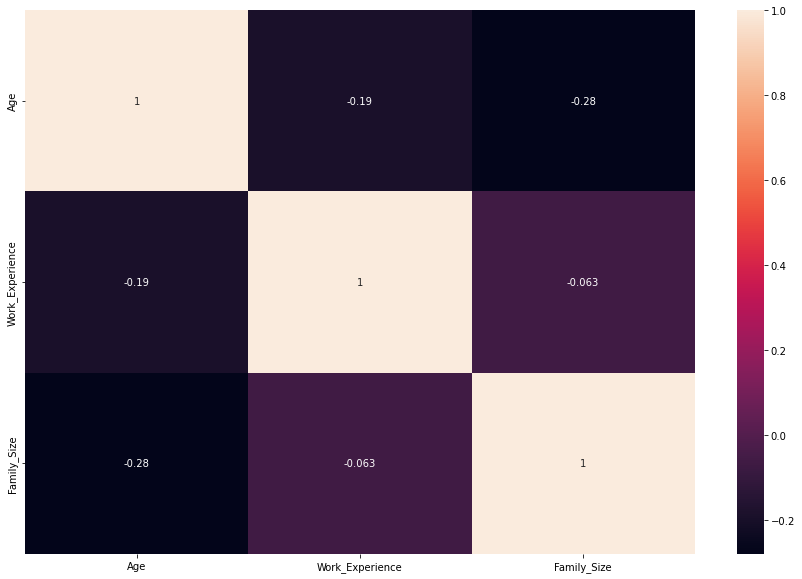

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, ax=ax)

There are no significant correlations in data.

Lets create column transformer and pipeline for each data type.

In [100]:
# Select columns
num_selector = make_column_selector(dtype_include='object')
cat_selector = make_column_selector(dtype_include='number')

# Instantiate Transformers
freq_imputer = SimpleImputer(strategy='most frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Make Pipelines for each column type
num_pipe = make_pipeline(freq_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Make column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple)